![Callysto.ca Banner](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-top.jpg?raw=true)


# Form and Function(s): A Sustainable Design meets Computation 

*Created as part of a Callysto funded project.* 

## <span style="color:blue">Introduction

<span style="color:blue"> When Architecture, the Natural Sciences, Mathematics and Computing intermingle something beautiful and purposeful occurs:

* Consider a structure’s architectural form in the context of its function within the ecology in which it belongs. 
* Explore nature’s designs, which are created through natural selection. 
* Emulate natural selection through computational thinking in math modelling and computational coding.
* The journey comes full circle; model and code evolutionary algorithms to design a better building. 

In [1]:
%run -i ./python_scripts/libraries.py
%run -i ./python_scripts/architecture_script.py
%run -i ./python_scripts/main.py

Select one of the perspectives available on form and function:

In [2]:
interact_manual(choose_subject, option = widgets.Dropdown(
    options=['Architecture', 'Biology', 'Computer Science', 'Math', 'Physics'],
    value='Architecture',
    description='Subject:',
    disabled=False,
));

interactive(children=(Dropdown(description='Subject:', options=('Architecture', 'Biology', 'Computer Science',…

# 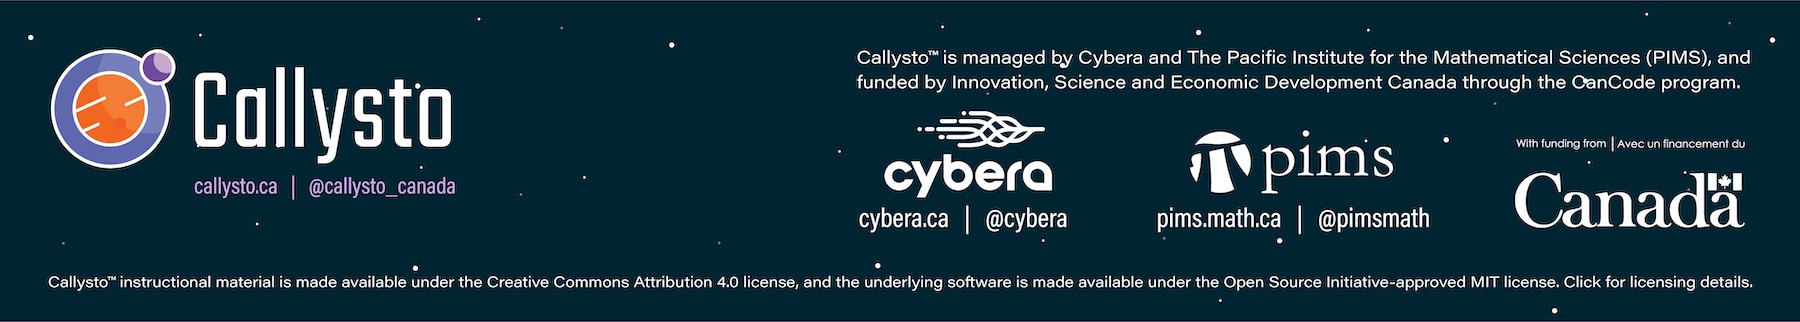

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle, PathPatch, Rectangle
from matplotlib.text import TextPath
from matplotlib.transforms import Affine2D
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import mpl_toolkits.mplot3d.art3d as art3d

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.view_init(60)

#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')

# Color the floor area
p = Rectangle((0, 0,0), 10, 15, fc='gray')
ax.add_patch(p)
art3d.pathpatch_2d_to_3d(p, z=0, zdir="z")

# Draw the left wall
#p = Rectangle((0, 0), 10, 10, fc='gray', ec="gray")
#ax.add_patch(p)
#art3d.pathpatch_2d_to_3d(p, z=10, zdir="x")

# Color the wall right
#p = Rectangle((0, 0,0), 10, 10, fc='gray')
#ax.add_patch(p)
#art3d.pathpatch_2d_to_3d(p, z=0, zdir="y")

# Color the roof
#p = Rectangle((0, 0,0), 10, 10, fc='gray')
#ax.add_patch(p)
#art3d.pathpatch_2d_to_3d(p, z=10, zdir="z")


# Draw a rectangle on the x=0 'wall'
p1 = Rectangle((5, 4), 6, 7.5, fc ='none', ec ='g', lw = 5)
ax.add_patch(p1)
art3d.pathpatch_2d_to_3d(p1, z=0, zdir="x")

# Draw a rectangle on the x=1 'wall'
#p2 = Rectangle((6, 8), 5, 6, fc ='none', ec ='g', lw = 5)
#ax.add_patch(p2)
#art3d.pathpatch_2d_to_3d(p2, z=4, zdir="y")

ax.set_xlim(0, 10)
ax.set_ylim(0, 15)
ax.set_zlim(0, 12)

plt.show()

In [40]:
import plotly.graph_objects as go
fig = go.Figure(data=[
    go.Mesh3d(
        # 8 vertices of a cube
        x=[0, 0, 1, 1, 0, 0, 1, 1],
        y=[0, 1, 1, 0, 0, 1, 1, 0],
        z=[0, 0, 0, 0, 1, 1, 1, 1],
        colorbar_title='z',
        colorscale=[[0, 'gold'],
                    [0.5, 'mediumturquoise'],
                    [1, 'magenta']],
        # Intensity of each vertex, which will be interpolated and color-coded
        intensity = np.linspace(0, 1, 12, endpoint=True),
        intensitymode='cell',
        # i, j and k give the vertices of triangles
        i = [7, 0, 0, 0, 4, 4, 6, 6, 4, 0, 3, 2],
        j = [3, 4, 1, 2, 5, 6, 5, 2, 0, 1, 6, 3],
        k = [0, 7, 2, 3, 6, 7, 1, 1, 5, 5, 7, 6],
        name='y',
        showscale=False
    )
])

fig.show()

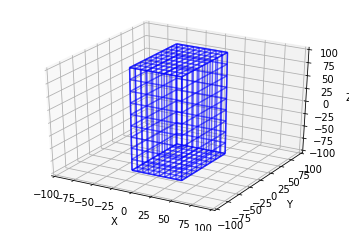

In [76]:
def plot_cuboid(center, size):
    """
       Create a data array for cuboid plotting.


       ============= ================================================
       Argument      Description
       ============= ================================================
       center        center of the cuboid, triple
       size          size of the cuboid, triple, (x_length,y_width,z_height)
       :type size: tuple, numpy.array, list
       :param size: size of the cuboid, triple, (x_length,y_width,z_height)
       :type center: tuple, numpy.array, list
       :param center: center of the cuboid, triple, (x,y,z)
   """
    # suppose axis direction: x: to left; y: to inside; z: to upper
    # get the (left, outside, bottom) point
    import numpy as np
    ox, oy, oz = center
    l, w, h = size

    x = np.linspace(ox-l/2,ox+l/2,num=10)
    y = np.linspace(oy-w/2,oy+w/2,num=10)
    z = np.linspace(oz-h/2,oz+h/2,num=10)
    x1, z1 = np.meshgrid(x, z)
    y11 = np.ones_like(x1)*(oy-w/2)
    y12 = np.ones_like(x1)*(oy+w/2)
    x2, y2 = np.meshgrid(x, y)
    z21 = np.ones_like(x2)*(oz-h/2)
    z22 = np.ones_like(x2)*(oz+h/2)
    y3, z3 = np.meshgrid(y, z)
    x31 = np.ones_like(y3)*(ox-l/2)
    x32 = np.ones_like(y3)*(ox+l/2)

    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.pyplot as plt
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    # outside surface
    ax.plot_wireframe(x1, y11, z1, color='b', rstride=1, cstride=1, alpha=0.6)
    # inside surface
    ax.plot_wireframe(x1, y12, z1, color='b', rstride=1, cstride=1, alpha=0.6)
    # bottom surface
    ax.plot_wireframe(x2, y2, z21, color='b', rstride=1, cstride=1, alpha=0.6)
    # upper surface
    ax.plot_wireframe(x2, y2, z22, color='b', rstride=1, cstride=1, alpha=0.6)
    # left surface
    ax.plot_wireframe(x31, y3, z3, color='b', rstride=1, cstride=1, alpha=0.6)
    # right surface
    ax.plot_wireframe(x32, y3, z3, color='b', rstride=1, cstride=1, alpha=0.6)
    ax.set_xlabel('X')
    ax.set_xlim(-100, 100)
    ax.set_ylabel('Y')
    ax.set_ylim(-100, 100)
    ax.set_zlabel('Z')
    ax.set_zlim(-100, 100)
    plt.show()



def test():
    center = [0, 0, 0]
    length = 32 * 2
    width = 50 * 2
    height = 100 * 2
    plot_cuboid(center, (length, width, height))


if __name__ == '__main__':
    test()

In [3]:
from ipycanvas import Canvas
canvas = Canvas(width=200, height=200)
canvas.fill_rect(25, 25, 100, 100)
canvas.clear_rect(45, 45, 60, 60)
canvas.stroke_rect(50, 50, 50, 50)
canvas

Canvas(layout=Layout(height='500px', width='700px'), size=(700, 500))

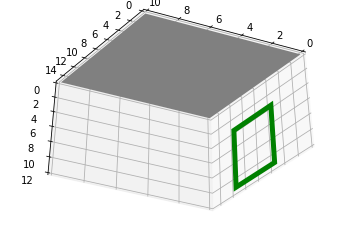

In [5]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.view_init(400)

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle, PathPatch, Rectangle
from matplotlib.text import TextPath
from matplotlib.transforms import Affine2D
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import mpl_toolkits.mplot3d.art3d as art3d

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.view_init(60)

#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')

# Color the floor area
p = Rectangle((0, 0,0), 10, 15, fc='gray')
ax.add_patch(p)
art3d.pathpatch_2d_to_3d(p, z=0, zdir="z")

# Draw the left wall
#p = Rectangle((0, 0), 10, 10, fc='gray', ec="gray")
#ax.add_patch(p)
#art3d.pathpatch_2d_to_3d(p, z=10, zdir="x")

# Color the wall right
#p = Rectangle((0, 0,0), 10, 10, fc='gray')
#ax.add_patch(p)
#art3d.pathpatch_2d_to_3d(p, z=0, zdir="y")

# Color the roof
#p = Rectangle((0, 0,0), 10, 10, fc='gray')
#ax.add_patch(p)
#art3d.pathpatch_2d_to_3d(p, z=10, zdir="z")


# Draw a rectangle on the x=0 'wall'
p1 = Rectangle((5, 4), 6, 7.5, fc ='none', ec ='g', lw = 5)
ax.add_patch(p1)
art3d.pathpatch_2d_to_3d(p1, z=0, zdir="x")

# Draw a rectangle on the x=1 'wall'
#p2 = Rectangle((6, 8), 5, 6, fc ='none', ec ='g', lw = 5)
#ax.add_patch(p2)
#art3d.pathpatch_2d_to_3d(p2, z=4, zdir="y")

ax.set_xlim(0, 10)
ax.set_ylim(0, 15)
ax.set_zlim(0, 12)

plt.show()
    